In [1]:
import cv2
import matplotlib.pyplot as plt
import face_recognition
from PIL import Image
import numpy as np

In [2]:
blur_kernel = (25,25)
k_h = 1.3
k_w = 1.1

In [3]:
def add_blur(frame, box):
    top, right, bottom, left = box

    mask = np.zeros_like(frame)
    
    cv2.ellipse(mask,
               (((left+right)//2, (top+bottom)//2),
                ((right - left)*k_w,(bottom - top) * k_h),
                0),
               (255,255,255), -1)
    neg_mask = cv2.bitwise_not(mask)


    blur_img = cv2.bitwise_and(cv2.blur(frame, (25,25)), mask)
    norm_img = cv2.bitwise_and(frame, neg_mask)
    new_img = cv2.bitwise_and(frame, blur_img)
    frame = cv2.add(norm_img, blur_img)
    return frame
    

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if ret:
        boxes = face_recognition.face_locations(frame)
        if boxes:
            for box in boxes:
                frame = add_blur(frame, box)
    cv2.imshow('Display', frame)
    cv2.waitKey(10)
    
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## Example

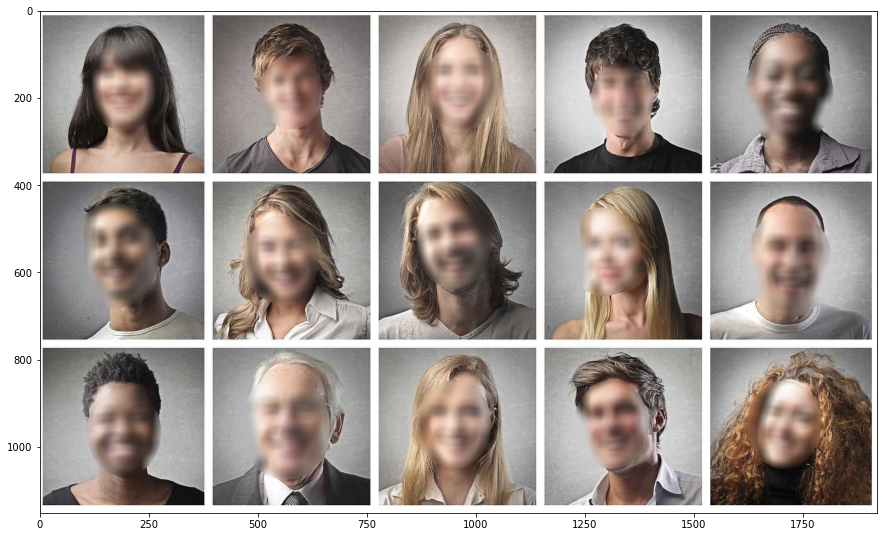

In [4]:
img = Image.open('some_faces.jpg')
img = np.array(img)
plt.figure(figsize=(15,15))
boxes = face_recognition.face_locations(img)
if boxes:
    for box in boxes:
        img = add_blur(img, box)
plt.imshow(img)